## keras与全连接神经网络

本节将以3个全连接神经网络的使用为例，重点介绍使用keras进行数据预处理，构建并行数据管道的方法。

### 一，结构化数据范例——Titanic生存预测

**1，准备数据**

In [2]:
import numpy as np 
import pandas as pd 

In [3]:
dftrain_raw = pd.read_csv('titanic_datasets/train.csv')
dftest_raw = pd.read_csv('titanic_datasets/test.csv')

In [4]:
dftrain_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


字段说明：

Survived:0代表死亡，1代表存活【y标签】

Pclass:乘客所持票类，有三种值(1,2,3) 【转换成onehot编码】

Name:乘客姓名 【舍去】

Sex:乘客性别 【转换成bool特征】

Age:乘客年龄(有缺失)  【数值特征，添加“年龄是否缺失”作为辅助特征】

SibSp:乘客兄弟姐妹/配偶的个数(整数值) 【数值特征】

Parch:乘客父母/孩子的个数(整数值)【数值特征】

Ticket:票号(字符串)【舍去】

Fare:乘客所持票的价格(浮点数，0-500不等) 【数值特征】

Cabin:乘客所在船舱(有缺失) 【添加“所在船舱是否缺失”作为辅助特征】

Embarked:乘客登船港口:S、C、Q(有缺失)【转换成onehot编码，四维度 S,C,Q,nan】

In [38]:
# 数据预处理
def preprocessing(dfdata):

    dfresult= pd.DataFrame()

    #Pclass
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' +str(x) for x in dfPclass.columns ]
    dfresult = pd.concat([dfresult,dfPclass],axis = 1)

    #Sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex],axis = 1)

    #Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    #SibSp,Parch,Fare
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    #Carbin
    dfresult['Cabin_null'] =  pd.isna(dfdata['Cabin']).astype('int32')

    #Embarked
    dfEmbarked = pd.get_dummies(dfdata['Embarked'],dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult,dfEmbarked],axis = 1)
    
    return(dfresult)

In [41]:
x_train = preprocessing(dftrain_raw)
y_train = dftrain_raw['Survived'].values

x_test = preprocessing(dftest_raw)

In [42]:
x_test

,Pclass_1,Pclass_2,Pclass_3,female,male,Age,Age_null,SibSp,Parch,Fare,Cabin_null,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0,0,1,0,1,34.5,0,0,0,7.8292,1,0,1,0,0
1,0,0,1,1,0,47.0,0,1,0,7.0000,1,0,0,1,0
2,0,1,0,0,1,62.0,0,0,0,9.6875,1,0,1,0,0
3,0,0,1,0,1,27.0,0,0,0,8.6625,1,0,0,1,0
4,0,0,1,1,0,22.0,0,1,1,12.2875,1,0,0,1,0
5,0,0,1,0,1,14.0,0,0,0,9.2250,1,0,0,1,0
6,0,0,1,1,0,30.0,0,0,0,7.6292,1,0,1,0,0
7,0,1,0,0,1,26.0,0,1,1,29.0000,1,0,0,1,0
8,0,0,1,1,0,18.0,0,0,0,7.2292,1,1,0,0,0
9,0,0,1,0,1,21.0,0,2,0,24.1500,1,0,0,1,0


**2，构建模型**

In [47]:
import keras
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(20,activation = 'relu',input_shape=(15,)))
model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(1,activation = 'sigmoid' ))

model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                320       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 761
Trainable params: 761
Non-trainable params: 0
_________________________________________________________________


**3，训练模型**

In [45]:
history = model.fit(x_train,y_train,
                    batch_size= 64,
                    epochs= 10,
                    validation_split=0.2)

Train on 712 samples, validate on 179 samples
Epoch 1/10
712/712 [==============================] - 1s 1ms/step - loss: 0.7171 - acc: 0.6067 - val_loss: 0.6694 - val_acc: 0.5978
Epoch 2/10
712/712 [==============================] - 0s 42us/step - loss: 0.6628 - acc: 0.5660 - val_loss: 0.6249 - val_acc: 0.5978
Epoch 3/10
712/712 [==============================] - 0s 45us/step - loss: 0.6443 - acc: 0.5969 - val_loss: 0.6024 - val_acc: 0.6369
Epoch 4/10
712/712 [==============================] - 0s 49us/step - loss: 0.6382 - acc: 0.6194 - val_loss: 0.5942 - val_acc: 0.6592
Epoch 5/10
712/712 [==============================] - 0s 51us/step - loss: 0.6361 - acc: 0.6461 - val_loss: 0.5935 - val_acc: 0.6927
Epoch 6/10
712/712 [==============================] - 0s 49us/step - loss: 0.6339 - acc: 0.6742 - val_loss: 0.5902 - val_acc: 0.7039
Epoch 7/10
712/712 [==============================] - 0s 59us/step - loss: 0.6332 - acc: 0.6671 - val_loss: 0.5816 - val_acc: 0.7207
Epoch 8/10
712/712 [====

**4，评估模型**

In [50]:
import pandas as pd 
dfhistory = pd.DataFrame(history.history)
dfhistory.index = range(1,len(dfhistory) + 1)
dfhistory.index.name = 'epoch'

In [51]:
dfhistory

,val_loss,val_acc,loss,acc
epoch,,,,
1,0.669432,0.597765,0.717073,0.606742
2,0.624928,0.597765,0.662811,0.566011
3,0.602357,0.636872,0.644313,0.596910
4,0.594224,0.659218,0.638201,0.619382
5,0.593519,0.692737,0.636087,0.646067
6,0.590226,0.703911,0.633864,0.674157
7,0.581629,0.720670,0.633243,0.667135
8,0.581904,0.720670,0.629928,0.671348
9,0.578605,0.715084,0.628013,0.674157


In [52]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

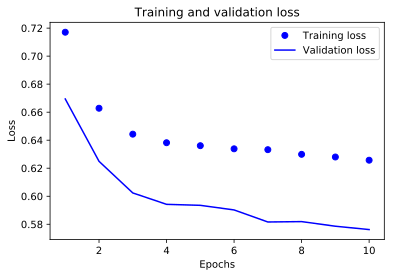

In [53]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

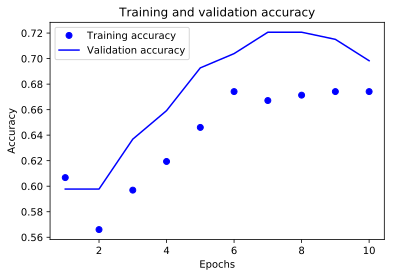

In [54]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**5,使用模型**

In [55]:
# 直接输出类别
model.predict_classes(x_test)

F:\ProgramFiles\Anaconda\lib\site-packages\keras\engine\sequential.py:271: RuntimeWarning: invalid value encountered in greater
  return (proba > 0.5).astype('int32')


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    